In [1]:
import tbapy
import matplotlib.pyplot as plt


In [2]:
tba = tbapy.TBA('gl4GXuoqG8anLUrLo356LIeeQZk15cfSoXF72YT3mYkI38cCoAmReoCSSF4XWccQ')
team = 'frc5987'

# Get the team's events
events = tba.team_events(team, simple=True)
events = filter(lambda event: event.event_type <= 5, events)
events = sorted(events, key=lambda event: event.start_date)

# Get the team's matches
wins = {}
for i, event in enumerate(events):
    if wins == {}: wins[event.year] = [0]
    if event.year not in wins: wins[event.year] = [wins[events[i-1].year][-1]]
    
    matches = tba.team_matches(team, event.key, simple=True)
    for match in matches:
        team_alliance = ''
        if team in match.alliances['blue']['team_keys']: team_alliance = 'blue'
        elif team in match.alliances['red']['team_keys']: team_alliance = 'red'
        else: continue

        if match.winning_alliance == team_alliance:
            wins[event.year].append(wins[event.year][-1] + 1)
        elif match.winning_alliance == '':
            wins[event.year].append(wins[event.year][-1])
        else:
            wins[event.year].append(wins[event.year][-1] - 1)

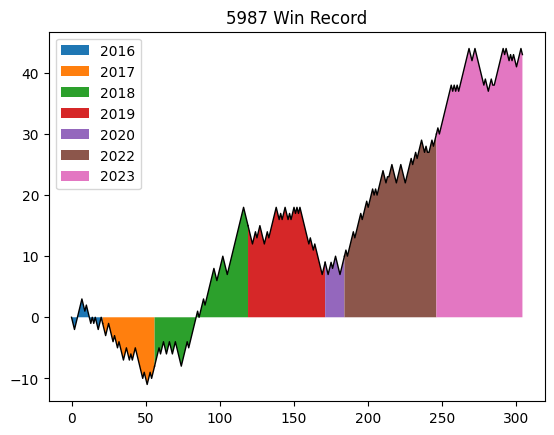

In [3]:
# Plot the data
plt.figure()
x = [0]
for year, data in wins.items():
    if len(data) <= 1: continue
    x = list(range(x[-1], x[-1] + len(wins[year])))
    plt.fill_between(x, data, label=year)
    plt.plot(x, data, color='black', linewidth=1)
plt.title(str(team[3:]) + ' Win Record')
plt.legend()